In [1]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

<Figure size 640x480 with 1 Axes>

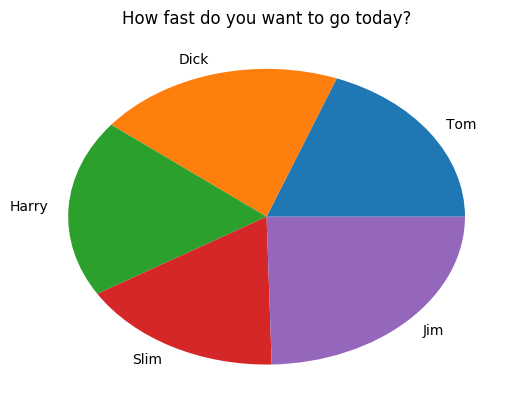

In [2]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


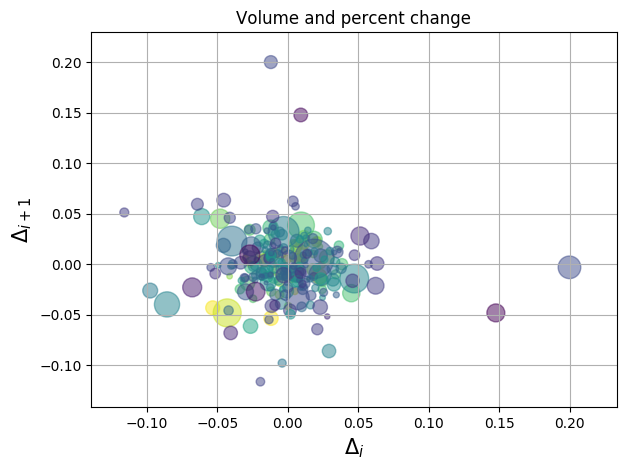

In [3]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

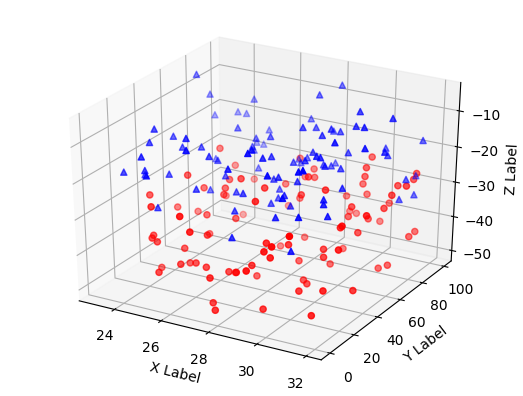

In [4]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Lecture

In [5]:
!pip install bokeh

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
import numpy as np
from bokeh.plotting import figure, output_file, show

n = 20
x_lim = 20
y_lim = 10
x = [np.random.randint(x_lim) for _ in range(n)]
y = [np.random.randint(y_lim) for _ in range(n)]

output_file("downloads/zigzag.html")

p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

p.line(x, y, legend="Zigzag.", line_width=1)

show(p)

In [9]:
# We can do things with hover
# https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#hovertool

from bokeh.plotting import figure, output_file, show, ColumnDataSource, output_notebook

output_file("toolbar.html")
output_notebook()

source = ColumnDataSource(data=dict(
    x=[1, 2, 3, 4, 5],
    y=[2, 5, 8, 2, 7],
    desc=['A', 'b', 'C', 'd', 'E'],
))

TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("desc", "@desc"),
]

p = figure(plot_width=400, plot_height=400, tooltips=TOOLTIPS,
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

Loading BokehJS ...

GlyphRenderer(id='1158', ...)

## Exercise

In [ ]:
# Getting data
!mkdir -p downloads
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip
!unzip $(basename https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip) -d downloads
!mv $(basename https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip) downloads 
!ls downloads

In [2]:
import pandas as pd
import numpy as np

base = './downloads/OnlineNewsPopularity/'
data = pd.read_csv(base+'OnlineNewsPopularity.csv')

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLasso

target = ' shares'

X = data.drop([target, 'url'], axis=1)
y = data[[target]]

classifier = MultiTaskLasso(normalize=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
classifier.fit(X_train, y_train)

MultiTaskLasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=True, random_state=None, selection='cyclic', tol=0.0001,
        warm_start=False)

In [5]:
predictions = pd.to_numeric(pd.Series(classifier.predict(X_test)[:, 0], index=X_test.index), downcast='float')

In [6]:
X_test_w_preds = X_test.assign(predictions=predictions)

This plot demonstrates the relation between an articles max_negative_polarity feature, which measures, of the negative words in a title, the most negative word, and the predicted number of times an article would be shared
on mashable. Here, we can see that of the posts most likely to be shared the most, a not-too-negative most-negative word is associated with a high share count.

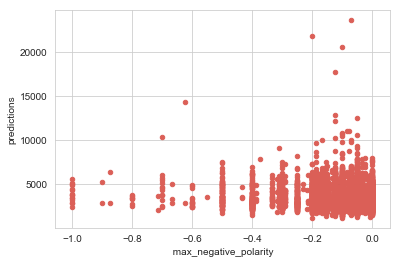

In [61]:
X_test_w_preds.plot(x=' max_negative_polarity', y='predictions', kind='scatter')

Similar to the above here we can see that titles who's most positive word plotted against predicted shares. Which seems to indicate that posts which had a pretty positive most-positive word, were deemed likely to be shared often.

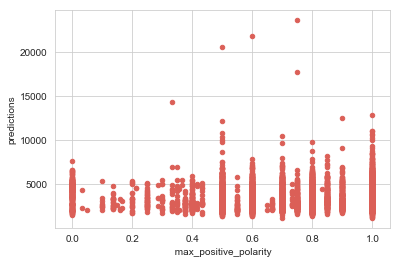

In [62]:
X_test_w_preds.plot(x=' max_positive_polarity', y='predictions', kind='scatter')

Here we can see the News Popularity data set, minus the shares feature, clustered into 40 groups and plotted in 3D! This data isn't the most high dimensional

<IPython.core.display.Javascript object>


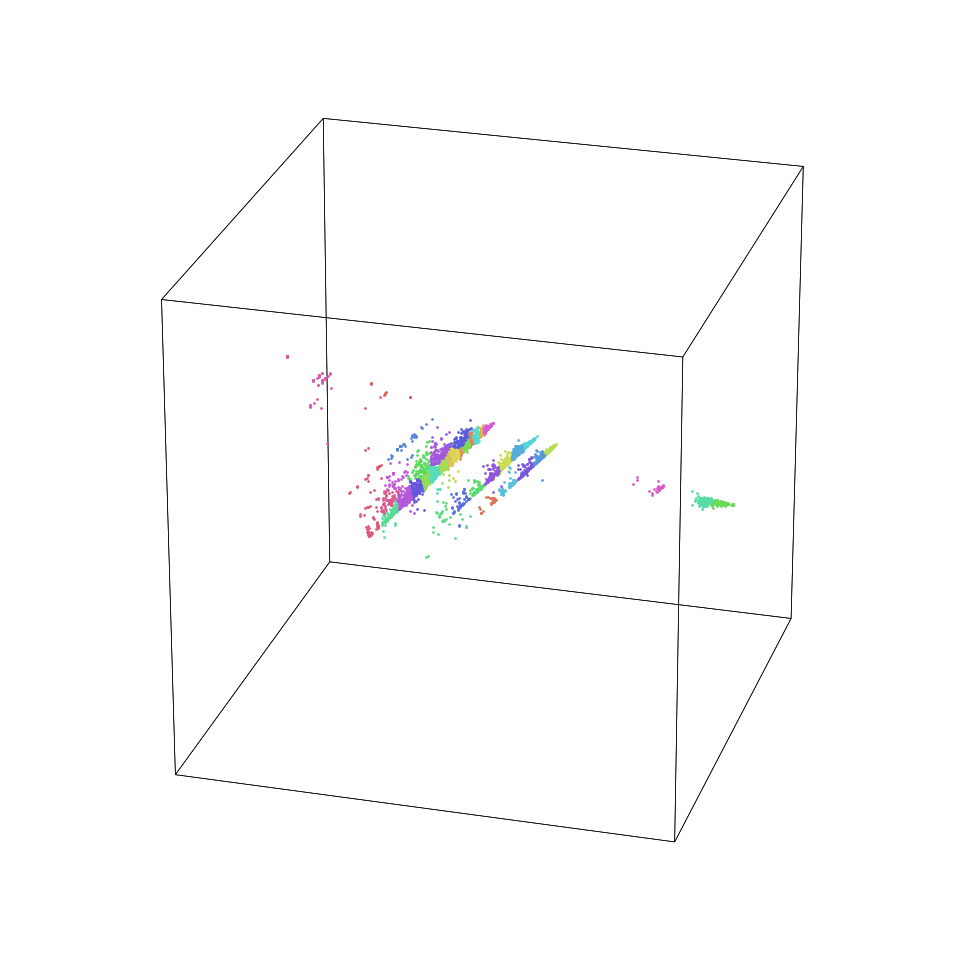

In [15]:
%matplotlib notebook

import hypertools as hyp

plt.rcParams["figure.figsize"] = (20,20)

# 3D and interactive!
hyp.plot(X_test, '.', n_clusters=40)

/Users/work/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/work/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


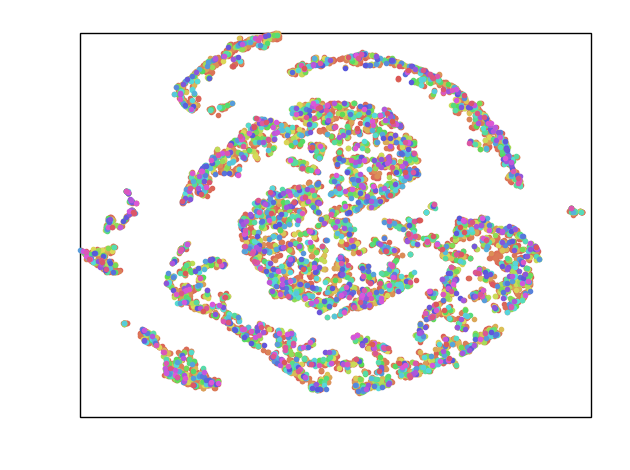

In [34]:
X_test_data = X_test.values
hue = y_test.values[:, 0].astype('str')

# TSNE!
hyp.plot(X_test_data, '.', reduce='TSNE', hue=hue, ndims=2)

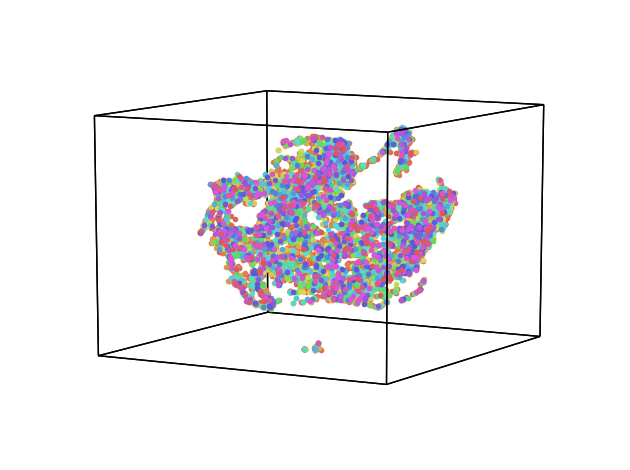

In [52]:
X_test_data = X_test.values
hue = y_test.values[:, 0].astype('str')

# TSNE!
hyp.plot(X_test_data, '.', reduce='TSNE', hue=hue, ndims=3)

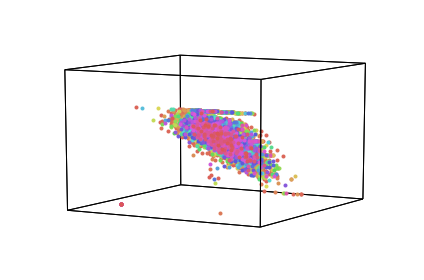

In [56]:
X_test_data = X_test[[' n_unique_tokens', ' rate_negative_words', ' rate_positive_words']].values
hue = y_test.values[:, 0].astype('str')

hyp.plot(X_test_data, '.', reduce='TSNE', hue=hue, ndims=3)

<IPython.core.display.Javascript object>


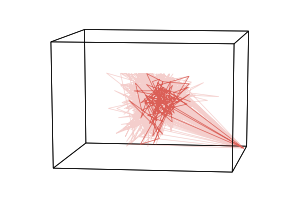

In [91]:
%matplotlib notebook

import IPython
import matplotlib.pyplot as plt

# Sometimes animtaes, somtimes does not
hyp.plot(X_test_data, normalize='across', animate=True, chemtrails=True)

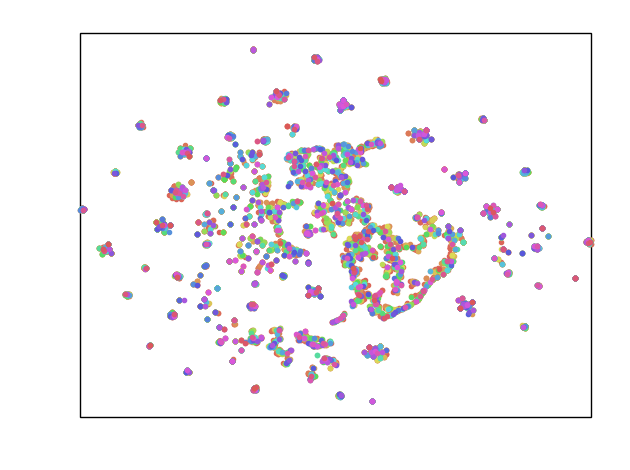

In [48]:
X_test_data = X_test[[' num_imgs', ' num_hrefs', ' num_videos']].values
hue = y_test.values[:, 0].astype('str')

hyp.plot(X_test_data, '.', reduce='TSNE', hue=hue, ndims=2)

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

target = ' shares'

X = data.drop([target, 'url'], axis=1)
y = data[[target]]

forest = ExtraTreesClassifier(n_estimators=3)
X_train, X_test, y_train, y_test = train_test_split(X, y)

forest.fit(X_train, y_train)

/Users/work/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

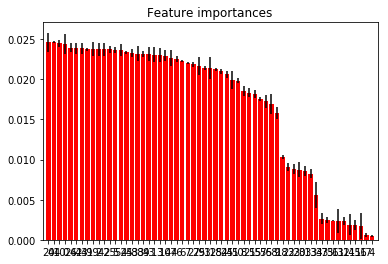

[(0.024626371266485623, ' kw_avg_min', 21),
 (0.024622142960720687, ' LDA_03', 42),
 (0.024493751662301718, ' LDA_02', 41),
 (0.02437607322688251, ' timedelta', 1),
 (0.023908537706094853, ' kw_avg_avg', 27),
 (0.023857471948723702, ' global_sentiment_polarity', 45),
 (0.023837064259245155, ' kw_avg_max', 24),
 (0.023761822633310666, ' avg_positive_polarity', 50),
 (0.023759184452968766, ' kw_max_min', 20),
 (0.023738349466476173, ' n_tokens_content', 3),
 (0.023736673155404123, ' LDA_04', 43),
 (0.023722190626142118, ' kw_max_avg', 26),
 (0.023665445930357534, ' n_non_stop_unique_tokens', 6),
 (0.02361956946544159, ' avg_negative_polarity', 53),
 (0.023342383641723047, ' global_rate_positive_words', 46),
 (0.02327319049164713, ' rate_negative_words', 49),
 (0.023206240651467563, ' LDA_00', 39),
 (0.023157267775874648, ' LDA_01', 40),
 (0.023150863912382056, ' global_subjectivity', 44),
 (0.023067814104112728, ' n_tokens_title', 2),
 (0.022983089745398425, ' n_unique_tokens', 4),
 (0.0

In [8]:
import itertools

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]

#print("Feature ranking:")
#for feature, importance in zip(data.columns, forest.feature_importances_):
#    print("%s: %f" % (feature, importance))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(
    range(X_train.shape[1]), 
    importances[indices],
    color="r", 
    yerr=std[indices], 
    align="center"
)

plt.rcParams["figure.figsize"] = (20,20)

plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

importances = list(zip(forest.feature_importances_, X_train.columns, itertools.count(1,1)))
importances.sort(reverse=True)
importances

In [12]:
y_pred = forest.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)

In [ ]:
import seaborn as sns

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)